In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data  = pd.read_csv("/content/Amazon Sales data.csv")

In [ ]:
data.head(100)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [ ]:
data.shape

(100, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

1)Observation:
It is observed that there are no zeroes and no null values in data.
It is also observed that there are no duplicates in dataframes.

<Axes: xlabel='Unit Price', ylabel='Count'>

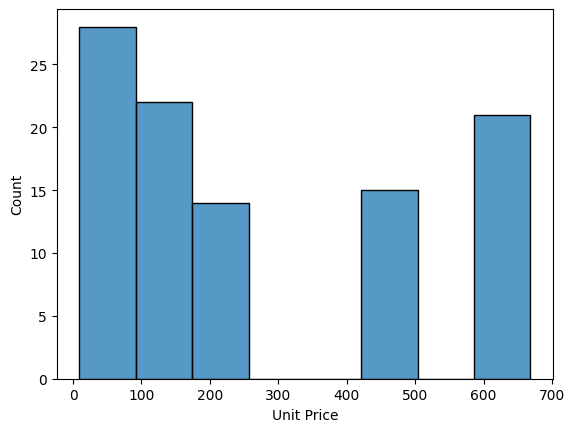

In [ ]:
sns.histplot(data["Unit Price"])  ###this is not correct one as we have only 11 unit prices

In [ ]:
col_list = ["Units Sold","Total Revenue","Total Profit"]
item_data = data.groupby(["Item Type"])[col_list].sum()
item_data = pd.DataFrame(item_data)
item_data.reset_index(level = 0,inplace = True)
item_data

,Item Type,Units Sold,Total Revenue,Total Profit
0,Baby Food,40545,10350327.60,3886643.70
1,Beverages,56708,2690794.60,888047.28
2,Cereal,25877,5322898.90,2292443.43
3,Clothes,71260,7787292.80,5233334.40
4,Cosmetics,83718,36601509.60,14556048.66
5,Fruits,49998,466481.34,120495.18
6,Household,44727,29889712.29,7412605.71
7,Meat,10675,4503675.75,610610.00
8,Office Supplies,46967,30585380.07,5929583.75
9,Personal Care,48708,3980904.84,1220622.48


In [ ]:
c_list = ["Item Type","Unit Price"]
c= data.groupby(["Item Type"])[c_list].agg("first")
c= pd.DataFrame(c)
c.reset_index(drop=True, inplace=True)
c.head(15)

,Item Type,Unit Price
0,Baby Food,255.28
1,Beverages,47.45
2,Cereal,205.70
3,Clothes,109.28
4,Cosmetics,437.20
5,Fruits,9.33
6,Household,668.27
7,Meat,421.89
8,Office Supplies,651.21
9,Personal Care,81.73


In [ ]:
Item_Data = item_data.merge(c, on = "Item Type")
Item_Data.head(15)

,Item Type,Units Sold,Total Revenue,Total Profit,Unit Price
0,Baby Food,40545,10350327.60,3886643.70,255.28
1,Beverages,56708,2690794.60,888047.28,47.45
2,Cereal,25877,5322898.90,2292443.43,205.70
3,Clothes,71260,7787292.80,5233334.40,109.28
4,Cosmetics,83718,36601509.60,14556048.66,437.20
5,Fruits,49998,466481.34,120495.18,9.33
6,Household,44727,29889712.29,7412605.71,668.27
7,Meat,10675,4503675.75,610610.00,421.89
8,Office Supplies,46967,30585380.07,5929583.75,651.21
9,Personal Care,48708,3980904.84,1220622.48,81.73


In [ ]:
region_data = data.groupby(["Region","Item Type"])[col_list].sum()
Region_Data = region_data.reset_index()
Region_Data

,Region,Item Type,Units Sold,Total Revenue,Total Profit
0,Asia,Clothes,14193,1551011.04,1042333.92
1,Asia,Cosmetics,6952,3039414.40,1208744.24
2,Asia,Fruits,6267,58471.11,15103.47
3,Asia,Household,12080,8072701.60,2002018.40
4,Asia,Office Supplies,11718,7630878.78,1479397.50
5,Asia,Personal Care,4901,400558.73,122819.06
6,Asia,Vegetables,3856,594055.36,243429.28
7,Australia and Oceania,Baby Food,12899,3292856.72,1236498.14
8,Australia and Oceania,Beverages,18768,890541.60,293906.88
9,Australia and Oceania,Cereal,682,140287.40,60418.38


From item data we can analyse
1)Revenue analysis which items are meeting expectations barchart
2)Scatter plot of item,unit sold and unit price to analyse relation between price and units sold
3)Scatter plot of item, profit and revenue to understand on which product we need to work for more profits
4)Analyse which items are sold in most in which months
5)Analyse in which regions which items are sold - map chart or stacked column
6)Analyse in which region sales are happening in months of year - histplot
7) Yearly sales pattern with revenue and regions - bar chart
8) Yearly sales pattern with revenue and items - bar chart
9) pie chart for items and revenue contribution overall
10)Countries associated with items check point map chart (5)

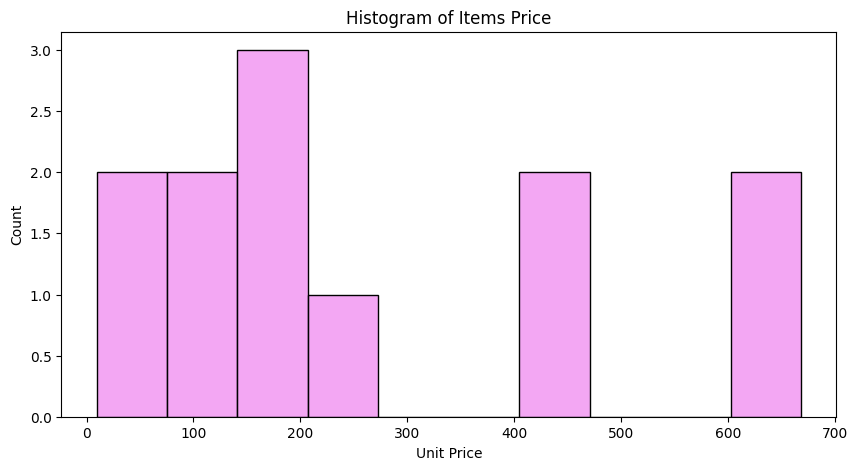

In [ ]:
plt.figure(figsize = (10,5),edgecolor = 'blue')
sns.histplot(data = Item_Data, x = "Unit Price", bins =10, color = 'violet',alpha = 0.7)
plt.title("Histogram of Items Price")
plt.show()

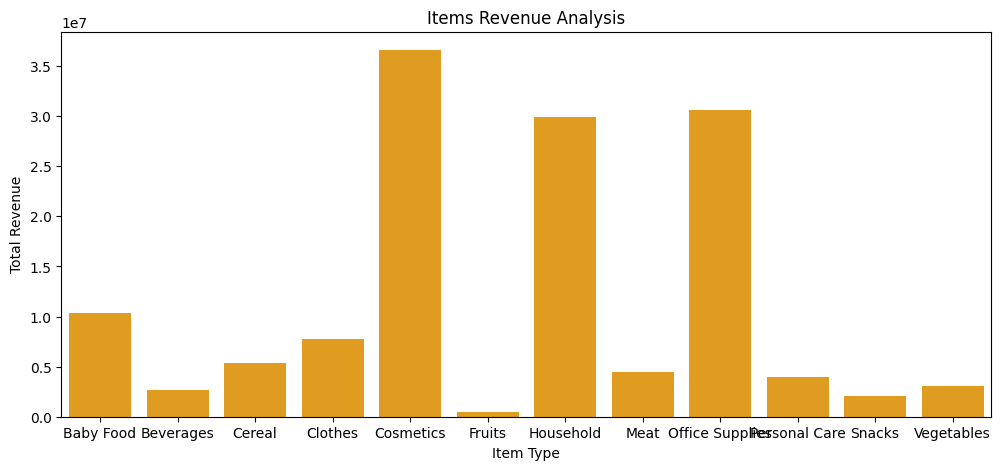

In [ ]:
plt.figure(figsize = (12,5))
sns.barplot(data = Item_Data, x = "Item Type", y = "Total Revenue", color = 'orange')
plt.title("Items Revenue Analysis")
plt.show()

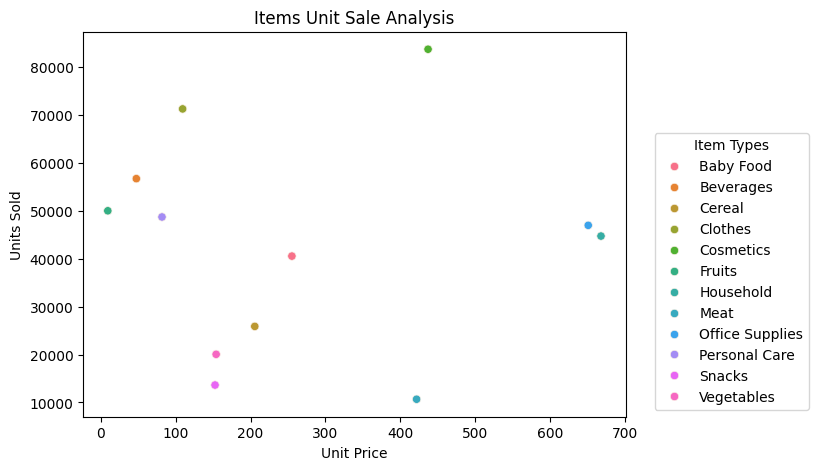

In [ ]:
plt.figure(figsize = (7,5))
sns.scatterplot(data = Item_Data, x = "Unit Price", y = "Units Sold",hue = "Item Type", edgecolor = "linen",legend = 4 )

plt.title("Items Unit Sale Analysis")
plt.legend(bbox_to_anchor = (1.35,0),loc = 'lower right',title = 'Item Types')

In [ ]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Order Month"] = data["Order Date"].dt.month
data["Order Year"] = data["Order Date"].dt.year
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013


In [ ]:
yearly_data = data.groupby(["Order Year","Item Type"])[col_list].sum()
yearly_data = pd.DataFrame(yearly_data)
yearly_data.reset_index(inplace = True)
yearly_data.head(50)

,Order Year,Item Type,Units Sold,Total Revenue,Total Profit
0,2010,Baby Food,9925,2533654.00,951410.50
1,2010,Clothes,18290,1998731.20,1343217.60
2,2010,Cosmetics,15144,6620956.80,2633087.28
3,2010,Fruits,5822,54319.26,14031.02
4,2010,Household,3830,2559474.10,634745.90
5,2010,Office Supplies,8287,5396577.27,1046233.75
6,2010,Personal Care,273,22312.29,6841.38
7,2011,Beverages,22726,1078348.70,355889.16
8,2011,Clothes,888,97040.64,65214.72
9,2011,Fruits,10051,93775.83,24222.91


In [ ]:
monthly_data = data.groupby(["Order Month","Item Type"])[col_list].sum()
monthly_data = pd.DataFrame(monthly_data)
monthly_data.reset_index(inplace = True)
monthly_data.head(50)

,Order Month,Item Type,Units Sold,Total Revenue,Total Profit
0,1,Beverages,8829,418936.05,138262.14
1,1,Clothes,8263,902980.64,606834.72
2,1,Household,8532,5701679.64,1414008.36
3,1,Meat,4767,2011149.63,272672.40
4,1,Office Supplies,1266,824431.86,159832.50
5,1,Snacks,4085,623289.30,225246.90
6,2,Baby Food,8533,2178304.24,817973.38
7,2,Beverages,8156,387002.20,127722.96
8,2,Clothes,2269,247956.32,166635.36
9,2,Cosmetics,10081,4407413.20,1752783.47


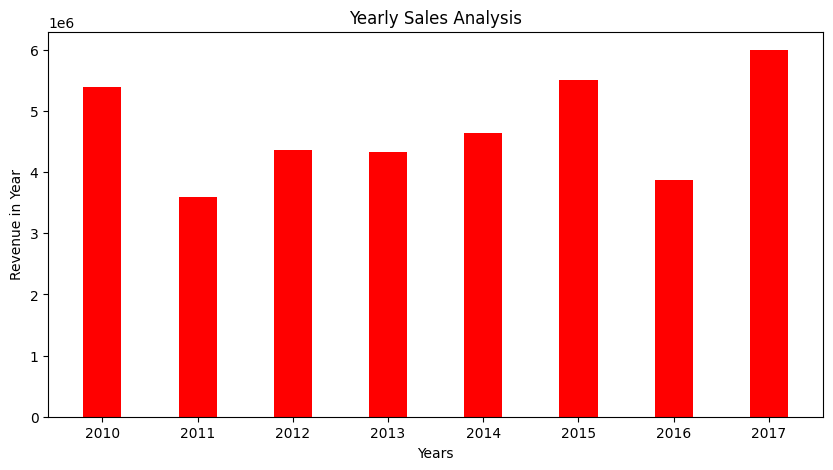

In [ ]:
years = data["Order Year"]
revenue = data["Total Revenue"]
plt.figure(figsize=(10,5),edgecolor = 'Blue')
plt.bar(years,revenue, width = 0.4, color = "red")
plt.title("Yearly Sales Analysis")
plt.xlabel("Years")
plt.ylabel("Revenue in Year")
plt.show()

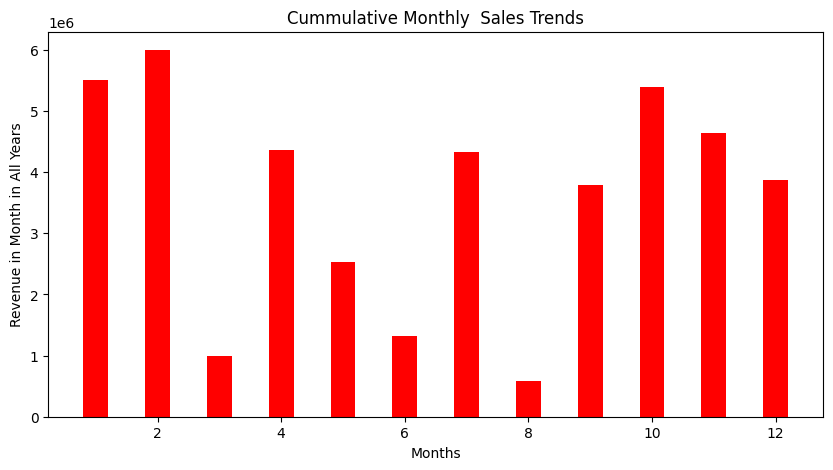

In [ ]:
years = data["Order Month"]
revenue = data["Total Revenue"]
plt.figure(figsize=(10,5),edgecolor = 'Blue')
plt.bar(years,revenue, width = 0.4, color = "red")
plt.title("Cummulative Monthly  Sales Trends")
plt.xlabel("Months")
plt.ylabel("Revenue in Month in All Years")
plt.show()

Text(0.5, 1.0, 'Items Revenue Division')

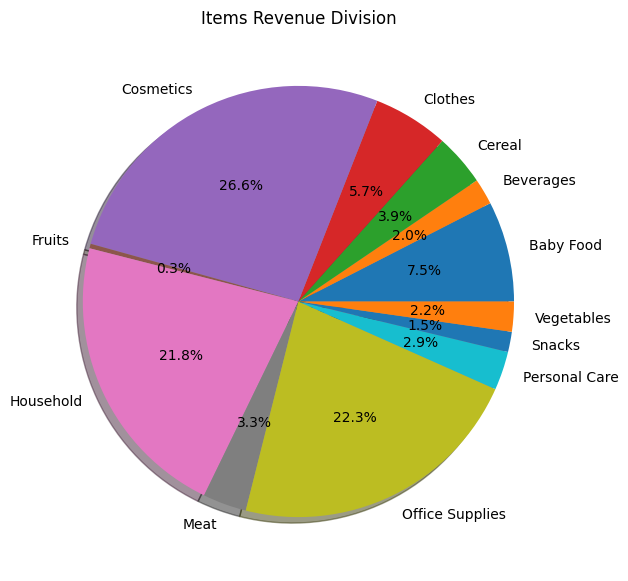

In [ ]:
plt.figure(figsize = (10,7))
plt.pie(Item_Data["Total Revenue"], labels = Item_Data["Item Type"],
        autopct = '%0.1f%%',shadow = True)
plt.title("Items Revenue Division")

In [ ]:
data.to_csv("Amazon Data.csv")
Item_Data.to_csv("Amazon Item Data.csv")
Region_Data.to_csv("Amazon Region Data.csv")
yearly_data.to_csv("Amazon Yearly Data.csv")
monthly_data.to_csv("Amazon Monthly Data.csv")